Dane pochodzą z Kaggle:
https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
aviation = pd.read_csv("AviationData.csv", encoding='latin-1', low_memory=False)
# df = pd.read_csv("USState_Codes.csv")

In [3]:

pd.set_option('display.max_columns', None)
aviation.shape

(88889, 31)

In [4]:
aviation.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


(88889, 31)

In [5]:
aviation.sample(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
74475,20131114X13203,Accident,WPR14LA050,2013-11-07,"Carefree, AZ",United States,033495N,1115353W,18AZ,SKY RANCH AT CAREFREE,Non-Fatal,Substantial,Airplane,N60TM,PIPER,PA 46 350P,No,1.0,Unknown,091,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,The failure of the left brake master cylinder ...,25-09-2020
35561,20001206X01645,Accident,ANC94LA086,1994-07-17,"PALMER, AK",United States,NaN,NaN,PAQ,PALMER,Non-Fatal,Substantial,NaN,N9278C,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,10-05-1995
82850,20190306X80709,Accident,DCA19CA091,2019-02-18,"Franklin, TN",United States,035545N,0865726W,NaN,NaN,Non-Fatal,NaN,Airplane,N3730B,Boeing,737,No,2.0,Turbo Fan,121,SCHD,NaN,Delta Air Lines Inc,0.0,1.0,1.0,143.0,IMC,NaN,an encounter with convective turbulence during...,03-06-2021
72904,20121115X55729,Accident,ERA13LA058,2012-11-15,"Lexington, KY",United States,003827N,0843619W,LEX,Blue Grass Airport,Non-Fatal,Substantial,Airplane,N9985B,CESSNA,172RG,No,1.0,Reciprocating,091,NaN,Instructional,Eastern Kentucky University,0.0,0.0,0.0,2.0,VMC,NaN,The rupture of the landing gears hydraulic pr...,25-09-2020
48285,20001212X20795,Accident,DEN00FA086,2000-04-30,"ESTES PARK, CO",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N7421S,"Smith, Ted Aerostar",AEROSTAR 601,No,2.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,06-04-2001
83563,20190715X23000,Accident,CEN19LA225,2019-07-14,"Knox, IN",United States,411739N,0863721W,IG05,Wheeler,Non-Fatal,Substantial,Airplane,N2863J,Cessna,T188,No,1.0,Reciprocating,091,NaN,Instructional,AAA Spraying Solutions LLC,0.0,0.0,1.0,0.0,VMC,NaN,The pilot's exceedance of the airplane's criti...,02-02-2021
58774,20050705X00923,Accident,ATL05LA094,2005-06-05,"TAZEWELL, TN",United States,36.41,-83.555278,NaN,NaN,Non-Fatal,Substantial,NaN,N341MA,Piper,PA-32R-301T,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,NaN,1.0,NaN,NaN,VMC,Cruise,Probable Cause,28-02-2006
76319,20150227X93828,Accident,CEN15CA155,2015-02-26,"Plymouth, IN",United States,412154N,0086181W,NaN,NaN,Non-Fatal,Substantial,Helicopter,N123XZ,GADDIS MICHAEL,EXEC 162 F,Yes,1.0,Reciprocating,091,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,NaN,The failure of the helicopter's main drive bel...,25-09-2020
20139,20001213X25404,Accident,ATL88LA154,1988-04-24,"WATKINSVILLE, GA",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,NaN,N5921T,Cessna,150D,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,Takeoff,Probable Cause,08-08-1989
76171,20150106X95852,Accident,ERA15LA092,2015-01-06,"Long View, NC",United States,354312N,0081824W,HKY,Hickory Regional Airport,Non-Fatal,Substantial,Airplane,N246JT,BEECH,V35B,No,1.0,Reciprocating,091,NaN,Personal,Jayson Jarvis,0.0,3.0,1.0,0.0,VMC,NaN,The improper installation of the lower rear cr...,25-09-2020


In [6]:
aviation.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [7]:
#creating a copy of original dataframe
original_aviation = aviation.copy()

In [8]:
aviation.keys()

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
#listing columns that contain Nans (as there are 27 columns that are incomplete, there is a need to consider how to handle the issue )
missing_data_col = aviation.columns[aviation.isna().any()].tolist()
missing_data_col, len(missing_data_col)

(['Location',
  'Country',
  'Latitude',
  'Longitude',
  'Airport.Code',
  'Airport.Name',
  'Injury.Severity',
  'Aircraft.damage',
  'Aircraft.Category',
  'Registration.Number',
  'Make',
  'Model',
  'Amateur.Built',
  'Number.of.Engines',
  'Engine.Type',
  'FAR.Description',
  'Schedule',
  'Purpose.of.flight',
  'Air.carrier',
  'Total.Fatal.Injuries',
  'Total.Serious.Injuries',
  'Total.Minor.Injuries',
  'Total.Uninjured',
  'Weather.Condition',
  'Broad.phase.of.flight',
  'Report.Status',
  'Publication.Date'],
 27)

In [12]:
#creating a function removing columns with missing data above established threshold and listing the removed columns

def drop_columns(df, thr = 0.5):
    missing_percentages = df.isna().mean()
    col_to_drop = missing_percentages[missing_percentages > thr].index
    new_df=df.drop(columns = col_to_drop)
    return new_df, list(col_to_drop)
    
    

In [13]:
# there are 6 columns to be removed when threshold 0.5 is applied
dropped_col_df, dropped_columns = drop_columns(aviation, 0.5)
dropped_columns

['Latitude',
 'Longitude',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

In [14]:
# there are 8 columns to be removed when threshold 0.4 is applied
dropped_col_df, dropped_columns = drop_columns(aviation, 0.4)
dropped_columns

['Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Aircraft.Category',
 'FAR.Description',
 'Schedule',
 'Air.carrier']

In [15]:
dropped_col_df.shape

(88889, 23)

In [30]:
#I decide to perform an analysis applying the threshold 0.4.

dropped_col_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [16]:

# For numerical variables the missing data will be replaced with a mean, but firstly let's check the number of missing values.


from tabulate import tabulate

def check_missing_values(df):
    pd.set_option('display.max_rows', None)
    print("The number of missing values in each column:")
    table_data = []
    for column in df.columns:
        missing_count = df[column].isna().sum()
        table_data.append([column, missing_count])

    print(tabulate(table_data, headers = ["Column", "No. of missing values"], tablefmt = "grid"))

    pd.reset_option('display.max_rows', None)

In [17]:
check_missing_values(dropped_col_df)

The number of missing values in each column:
+------------------------+-------------------------+
| Column                 |   No. of missing values |
+========================+=========================+
| Event.Id               |                       0 |
+------------------------+-------------------------+
| Investigation.Type     |                       0 |
+------------------------+-------------------------+
| Accident.Number        |                       0 |
+------------------------+-------------------------+
| Event.Date             |                       0 |
+------------------------+-------------------------+
| Location               |                      52 |
+------------------------+-------------------------+
| Country                |                     226 |
+------------------------+-------------------------+
| Injury.Severity        |                    1000 |
+------------------------+-------------------------+
| Aircraft.damage        |                    3194 |
+

In [25]:
#the DataFrame without any nans (all the missing values have been removed)

df_rem_nans = dropped_col_df.dropna()
df_rem_nans

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,Fatal(4),Destroyed,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,N7967Q,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63893,20080104X00022,Accident,MIA08LA032,2007-12-26,"SARASOTA, FL",United States,Non-Fatal,Substantial,N5875Q,Mooney,M20E,No,1.0,Reciprocating,Personal,0.0,0.0,2.0,0.0,VMC,Takeoff,Probable Cause,14-01-2009
63896,20071231X02008,Incident,DEN08IA044,2007-12-26,"Aspen, CO",United States,Incident,Minor,N47BC,Piper,PA-46-310P,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,4.0,VMC,Climb,Probable Cause,24-12-2008
63900,20080102X00006,Accident,SEA08LA054,2007-12-28,"MURRIETA, CA",United States,Non-Fatal,Substantial,N365SX,Hein,Sonex,Yes,1.0,Reciprocating,Personal,0.0,1.0,0.0,0.0,VMC,Cruise,Probable Cause,24-12-2008
63906,20080103X00010,Accident,DFW08LA052,2007-12-29,"Crowley, TX",United States,Fatal(2),Destroyed,N136DG,Althouse,RAF 2000 GTX,Yes,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,03-12-2008


In [226]:
# dropped_col_df["Total.Fatal.Injuries"].fillna(dropped_col_df["Total.Fatal.Injuries"].mean(), inplace = True)
# dropped_col_df["Total.Serious.Injuries"].fillna(dropped_col_df["Total.Serious.Injuries"].mean(), inplace = True)
# dropped_col_df["Total.Minor.Injuries"].fillna(dropped_col_df["Total.Minor.Injuries"].mean(), inplace = True)
# dropped_col_df["Total.Uninjured"].fillna(dropped_col_df["Total.Uninjured"].mean(), inplace = True)

# dropped_col_df["Location"].fillna('Unknown', inplace = True)
# dropped_col_df["Country"].fillna('Unknown', inplace = True)
# dropped_col_df["Injury.Severity"].fillna('Unknown', inplace = True)
# dropped_col_df["Aircraft.damage"].fillna('Unknown', inplace = True)
# dropped_col_df["Registration.Number"].fillna('Unknown', inplace = True)
# dropped_col_df["Make"].fillna('Unknown', inplace = True)
# dropped_col_df["Model"].fillna('Unknown', inplace = True)
# dropped_col_df["Amateur.Built"].fillna('Unknown', inplace = True)
# dropped_col_df["Number.of.Engines"].fillna('Unknown', inplace = True)
# dropped_col_df["Engine.Type"].fillna('Unknown', inplace = True)
# dropped_col_df["Purpose.of.flight"].fillna('Unknown', inplace = True)
# dropped_col_df["Weather.Condition"].fillna('Unknown', inplace = True)
# dropped_col_df["Broad.phase.of.flight"].fillna('Unknown', inplace = True)
# dropped_col_df["Report.Status"].fillna('Unknown', inplace = True)
# dropped_col_df["Publication.Date"].fillna('Unknown', inplace = True)


In [30]:
dropped_col_df.head(5)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [37]:
# dropped_col_df[dropped_col_df["Country"] == "United States"].count()

In [52]:
dropped_col_df["Make"].unique()

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [55]:
len(dropped_col_df["Make"].unique())

8238

In [57]:
# Data preprocessing - Pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


numeric_features = ["Number.of.Engines", "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
categorical_features = ["Investigation.Type", "Aircraft.damage", "Amateur.Built", "Number.of.Engines", "Engine.Type", "Purpose.of.flight", "Weather.Condition", "Broad.phase.of.flight"]

numeric_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="mean")), ('scaling', StandardScaler())])
categorical_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy="most_frequent")), ('onehot', OneHotEncoder())])


transformer = ColumnTransformer(transformers= [('num', numeric_pipeline, numeric_features),
                                               ('cat', categorical_pipeline, categorical_features)],
                                               remainder='passthrough')

transformed_data = transformer.fit_transform(dropped_col_df)



ValueError: For a sparse output, all columns should be a numeric or convertible to a numeric.

In [16]:
#changing date (presented as string) to date format 
dropped_col_df["Event.Date"] = pd.to_datetime(dropped_col_df["Event.Date"])


In [42]:
dropped_col_df["Report.Status"].unique()

array(['Probable Cause', 'Factual', 'Foreign', ...,
       'The pilot did not ensure adequate clearance from construction vehicles during taxi.',
       'The pilot\x92s failure to secure the magneto switch before attempting to hand rotate the engine which resulted in an inadvertent engine start, a runaway airplane, and subsequent impact with parked airplanes. Contributing to the accident was the failure to properly secure the airplane with chocks.',
       'The pilot\x92s loss of control due to a wind gust during landing.'],
      dtype=object)

In [39]:
dropped_col_df["Injury.Severity"].unique()

array(['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)',
       'Fatal(5)', 'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)',
       'Fatal(10)', 'Fatal(11)', 'Fatal(9)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(29)', 'Fatal(70)', 'Unavailable', 'Fatal(135)', 'Fatal(31)',
       'Fatal(256)', 'Fatal(25)', 'Fatal(82)', 'Fatal(156)', 'Fatal(28)',
       'Fatal(18)', 'Fatal(43)', 'Fatal(15)', 'Fatal(270)', 'Fatal(144)',
       'Fatal(174)', 'Fatal(111)', 'Fatal(131)', 'Fatal(20)', 'Fatal(73)',
       'Fatal(27)', 'Fatal(34)', 'Fatal(87)', 'Fatal(30)', 'Fatal(16)',
       'Fatal(47)', 'Fatal(56)', 'Fatal(37)', 'Fatal(132)', 'Fatal(68)',
       'Fatal(54)', 'Fatal(52)', 'Fatal(65)', 'Fatal(72)', 'Fatal(160)',
       'Fatal(189)', 'Fatal(123)', 'Fatal(33)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(97)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(75)', 'Fatal(104)', 'Fatal(229)', 'Fatal

In [17]:
# analyzing the total fatal injuries

dropped_col_df["Total.Fatal.Injuries"].describe()

count    77488.000000
mean         0.647855
std          5.485960
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        349.000000
Name: Total.Fatal.Injuries, dtype: float64

In [18]:
# The below records refer to one accident that took place in 1996 in Indie. Two planes crashed in the air. 349 is the total number of injuries from both aircrafts. 
# In the analysis it is an outlier.

dropped_col_df[dropped_col_df["Total.Fatal.Injuries"] == 349]

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
40881,20020124X00116,Accident,DCA97WA007B,1996-11-12,"New Delhi, India",India,Fatal(349),NaN,NaN,Tupolev,TU-154,No,NaN,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002
40882,20020124X00116,Accident,DCA97WA007A,1996-11-12,"New Delhi, India",India,Fatal(349),NaN,NaN,Boeing,747-168,No,NaN,NaN,NaN,349.0,NaN,NaN,NaN,NaN,NaN,Foreign,24-01-2002


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(dropped_col_df["Total.Fatal.Injuries"], )

AttributeError: 'numpy.ndarray' object has no attribute 'count'

<Figure size 800x600 with 0 Axes>

ValueError: not enough values to unpack (expected 2, got 1)

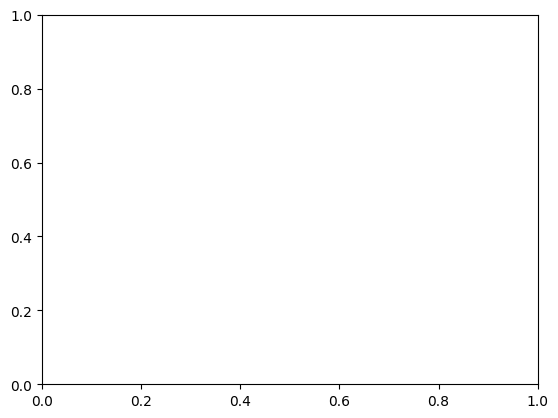

In [21]:

plt.boxplot(dropped_col_df["Total.Fatal.Injuries"], vert = False, whis=[2])
plt.show()

In [24]:
percentile_99 = np.percentile(dropped_col_df["Total.Fatal.Injuries"], 99)
percentile_99

# In 99% of records the number of casualties is 5 or fewer.

nan

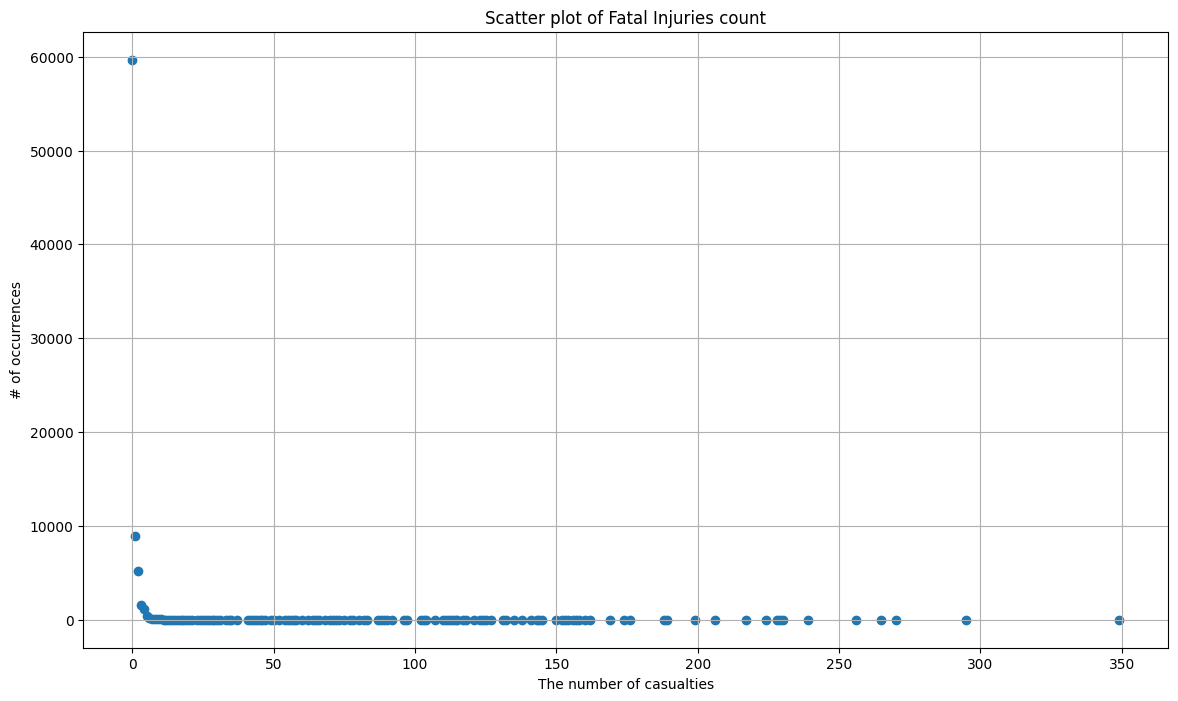

In [25]:
#creating scatter plot to make data more readable / easily visible

counts_fatal = dropped_col_df["Total.Fatal.Injuries"].value_counts()

plt.figure(figsize=(14,8))
plt.scatter(counts_fatal.index, counts_fatal)
plt.xlabel("The number of casualties")
plt.ylabel("# of occurrences")
plt.title("Scatter plot of Fatal Injuries count")
plt.grid()
plt.show()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.000000,0.000000,0.00000,UNK,Cruise,Probable Cause,Unknown
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.000000,0.000000,0.00000,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,0.279881,0.357061,5.32544,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.000000,0.000000,0.00000,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,501,No,Unknown,Unknown,Personal,1.0,2.000000,0.357061,0.00000,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,Unknown,N1867H,PIPER,PA-28-151,No,Unknown,Unknown,Personal,0.0,1.000000,0.000000,0.00000,Unknown,Unknown,Unknown,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,Unknown,Unknown,N2895Z,BELLANCA,7ECA,No,Unknown,Unknown,Unknown,0.0,0.000000,0.000000,0.00000,Unknown,Unknown,Unknown,Unknown
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,Unknown,Personal,0.0,0.000000,0.000000,1.00000,VMC,Unknown,Unknown,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,Unknown,Unknown,N210CU,CESSNA,210N,No,Unknown,Unknown,Personal,0.0,0.000000,0.000000,0.00000,Unknown,Unknown,Unknown,Unknown


In [282]:
# preparing data for modelling
#OneHotEncoding

X = dropped_col_df[["Investigation.Type", "Event.Date", "Location", "Aircraft.damage", "Make", "Model", "Number.of.Engines", "Engine.Type", "Purpose.of.flight", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured", "Weather.Condition"]]
y = dropped_col_df["Total.Fatal.Injuries"]



preprocessor = ColumnTransformer(transformers= ['cat', OneHotEncoder(), 'Investigation.Type'], remainder="passthrough")




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_train.shape, y_test.shape, y_test.shape

((62222, 13), (62222, 13), (26667,), (26667,))

TypeError: 'OneHotEncoder' object is not iterable

In [277]:
# creating a model to predict fatal injuries 

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Accident'

In [ ]:
# def test_mcar(aviation, missing_data_col):
#     encoded_data = aviation[missing_data_col].isnull().astype(int)
#     chi2, p = chi2_contingency(pd.crosstab(encoded_data[missing_data_col[0]], encoded_data[missing_data_col[1]]))[:2]
#     return p

# pv_mcar = test_mcar(aviation, missing_data_col)

In [ ]:
# pv_mcar

In [ ]:
# aviation[missing_data_col].isnull().astype(int)

In [ ]:
# aviation[missing_data_col].isnull()

In [ ]:
# features = aviation.drop(['Investigation.Type', 'Event.Id'], axis=1)
# features